# Define system

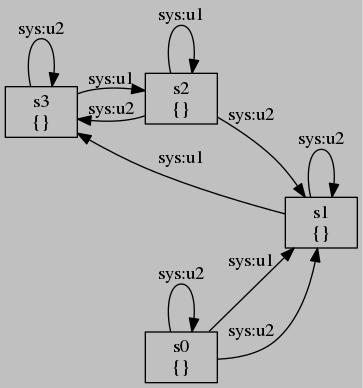

True

In [1]:
from tulip import transys

fts = transys.FTS()

fts.add_nodes_from(['s0', 's1', 's2', 's3']) # X
fts.sys_actions.add_from(['u1', 'u2'])       # U

fts.add_edge('s0', 's1', sys_actions='u1')
fts.add_edge('s0', 's0', sys_actions='u2')
fts.add_edge('s0', 's1', sys_actions='u2')

fts.add_edge('s1', 's1', sys_actions='u2')

fts.add_edge('s1', 's3', sys_actions='u1')
fts.add_edge('s2', 's1', sys_actions='u2')

fts.add_edge('s2', 's3', sys_actions='u2')
fts.add_edge('s2', 's2', sys_actions='u1')
fts.add_edge('s3', 's2', sys_actions='u1')
fts.add_edge('s3', 's3', sys_actions='u2')

fts.plot() # visualize the system (requires pydot + graphviz)

# Define labeling

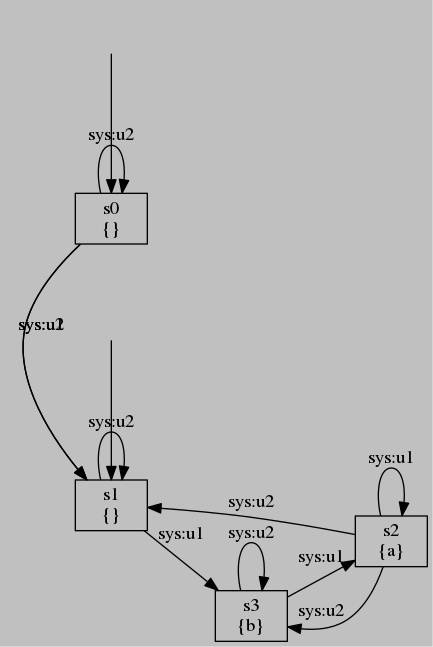

True

In [2]:
fts.states.initial.add('s0')
fts.states.initial.add('s1')

fts.atomic_propositions.add_from(['a', 'b'])
fts.node['s2']['ap'] |= {'a'}
fts.node['s3']['ap'] |= {'b'}

fts.plot() # visualize the system

# Define specification

In [3]:
from tulip import spec

sys_prog = set()
sys_prog |= {'a', 'b'}
formula = spec.GRSpec(sys_prog=sys_prog)

print formula.pretty() # print the formula on readable form

ENVIRONMENT VARIABLES:
	(none)

SYSTEM VARIABLES:
	(none)

FORMULA:
ASSUMPTION:
GUARANTEE:
    LIVENESS
	  []<>(a)
	& []<>(b)



# Solve synthesis problem and visualize contoller

removed 0 nodes from 9 total


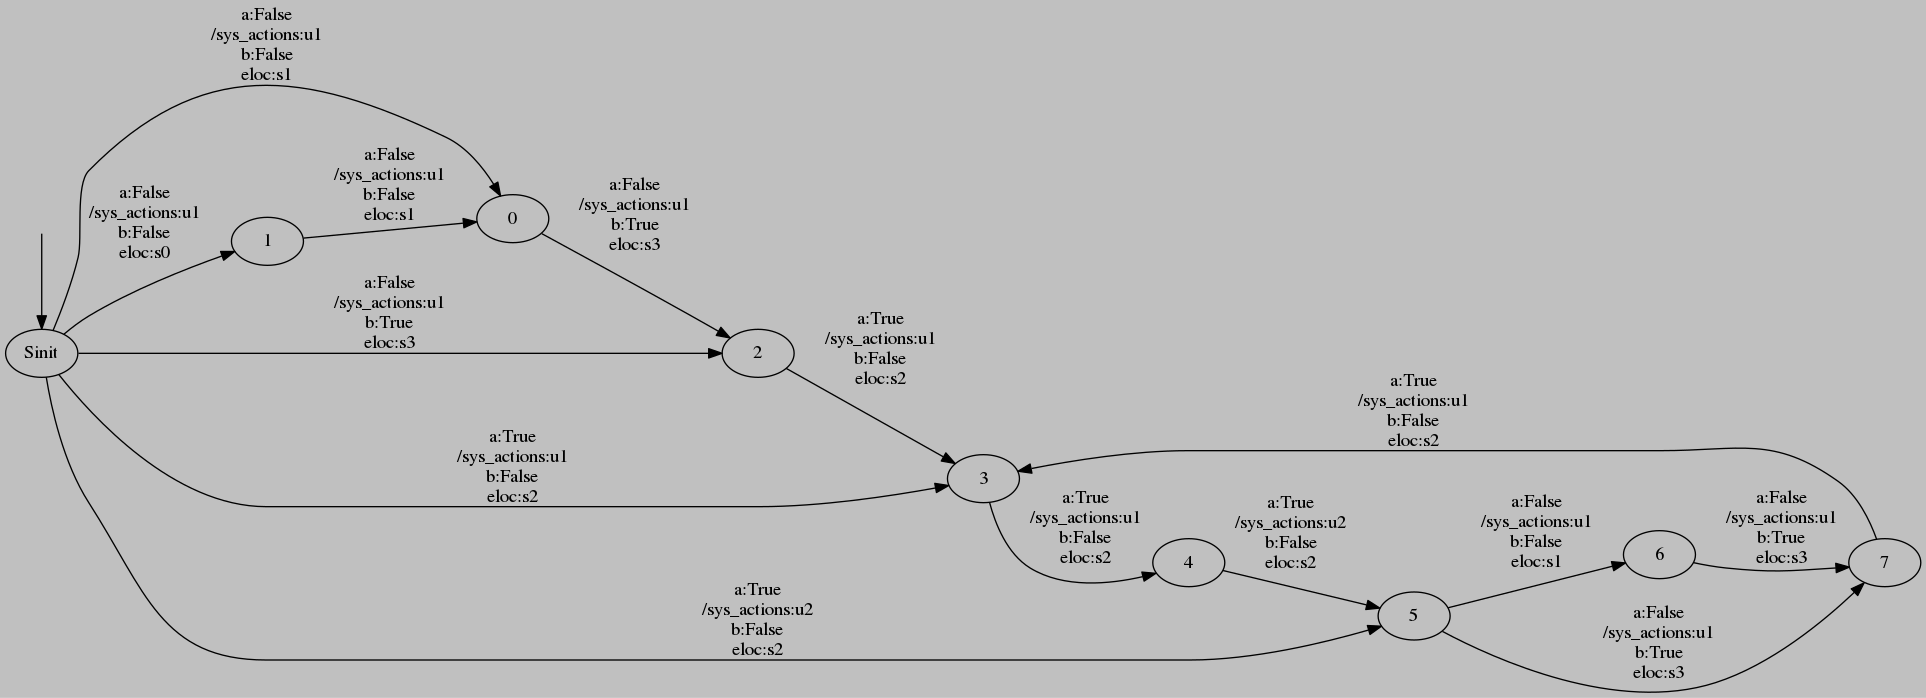

True

In [4]:
from tulip import synth

fts.owner = 'env'
formula.qinit = '\E \A'
formula.moore = False

cont = synth.synthesize('omega', formula, env=fts)

cont.plot() # plot the control strategy